In [3]:
# On this script I am going to find data patterns to undertand the data behaviors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Read and check
data_cardio=pd.read_csv("in\cardio_train.csv")
data_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Data type and general info
data_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# This data set is a already processed one. It doesn't have any missing value and the classes are already balanced as well.
# So, the main goal will be understanding the dataset, its patterns and prepare them for its late use on two ML models.

In [7]:
cardio_correlation=data_cardio.iloc[:,1:].corr()
print(cardio_correlation)
# In general is not posible to see any strong correlation. Except for, Cardio with age, weight and cholesterol.

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   

             cholesterol

<AxesSubplot: >

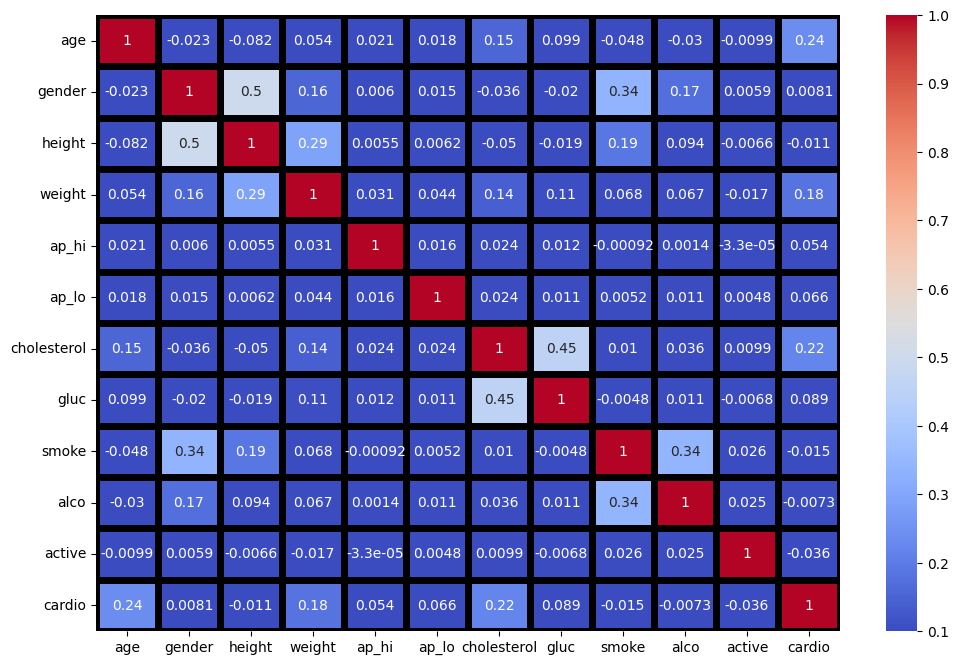

In [11]:
# Heatmap to view it better
fig = plt.subplots(figsize=(12,8))
sns.heatmap(cardio_correlation, annot=True, cmap="coolwarm", linewidths=5, linecolor='black', vmin=0.1, vmax=1,cbar=True)

In [12]:
data_cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

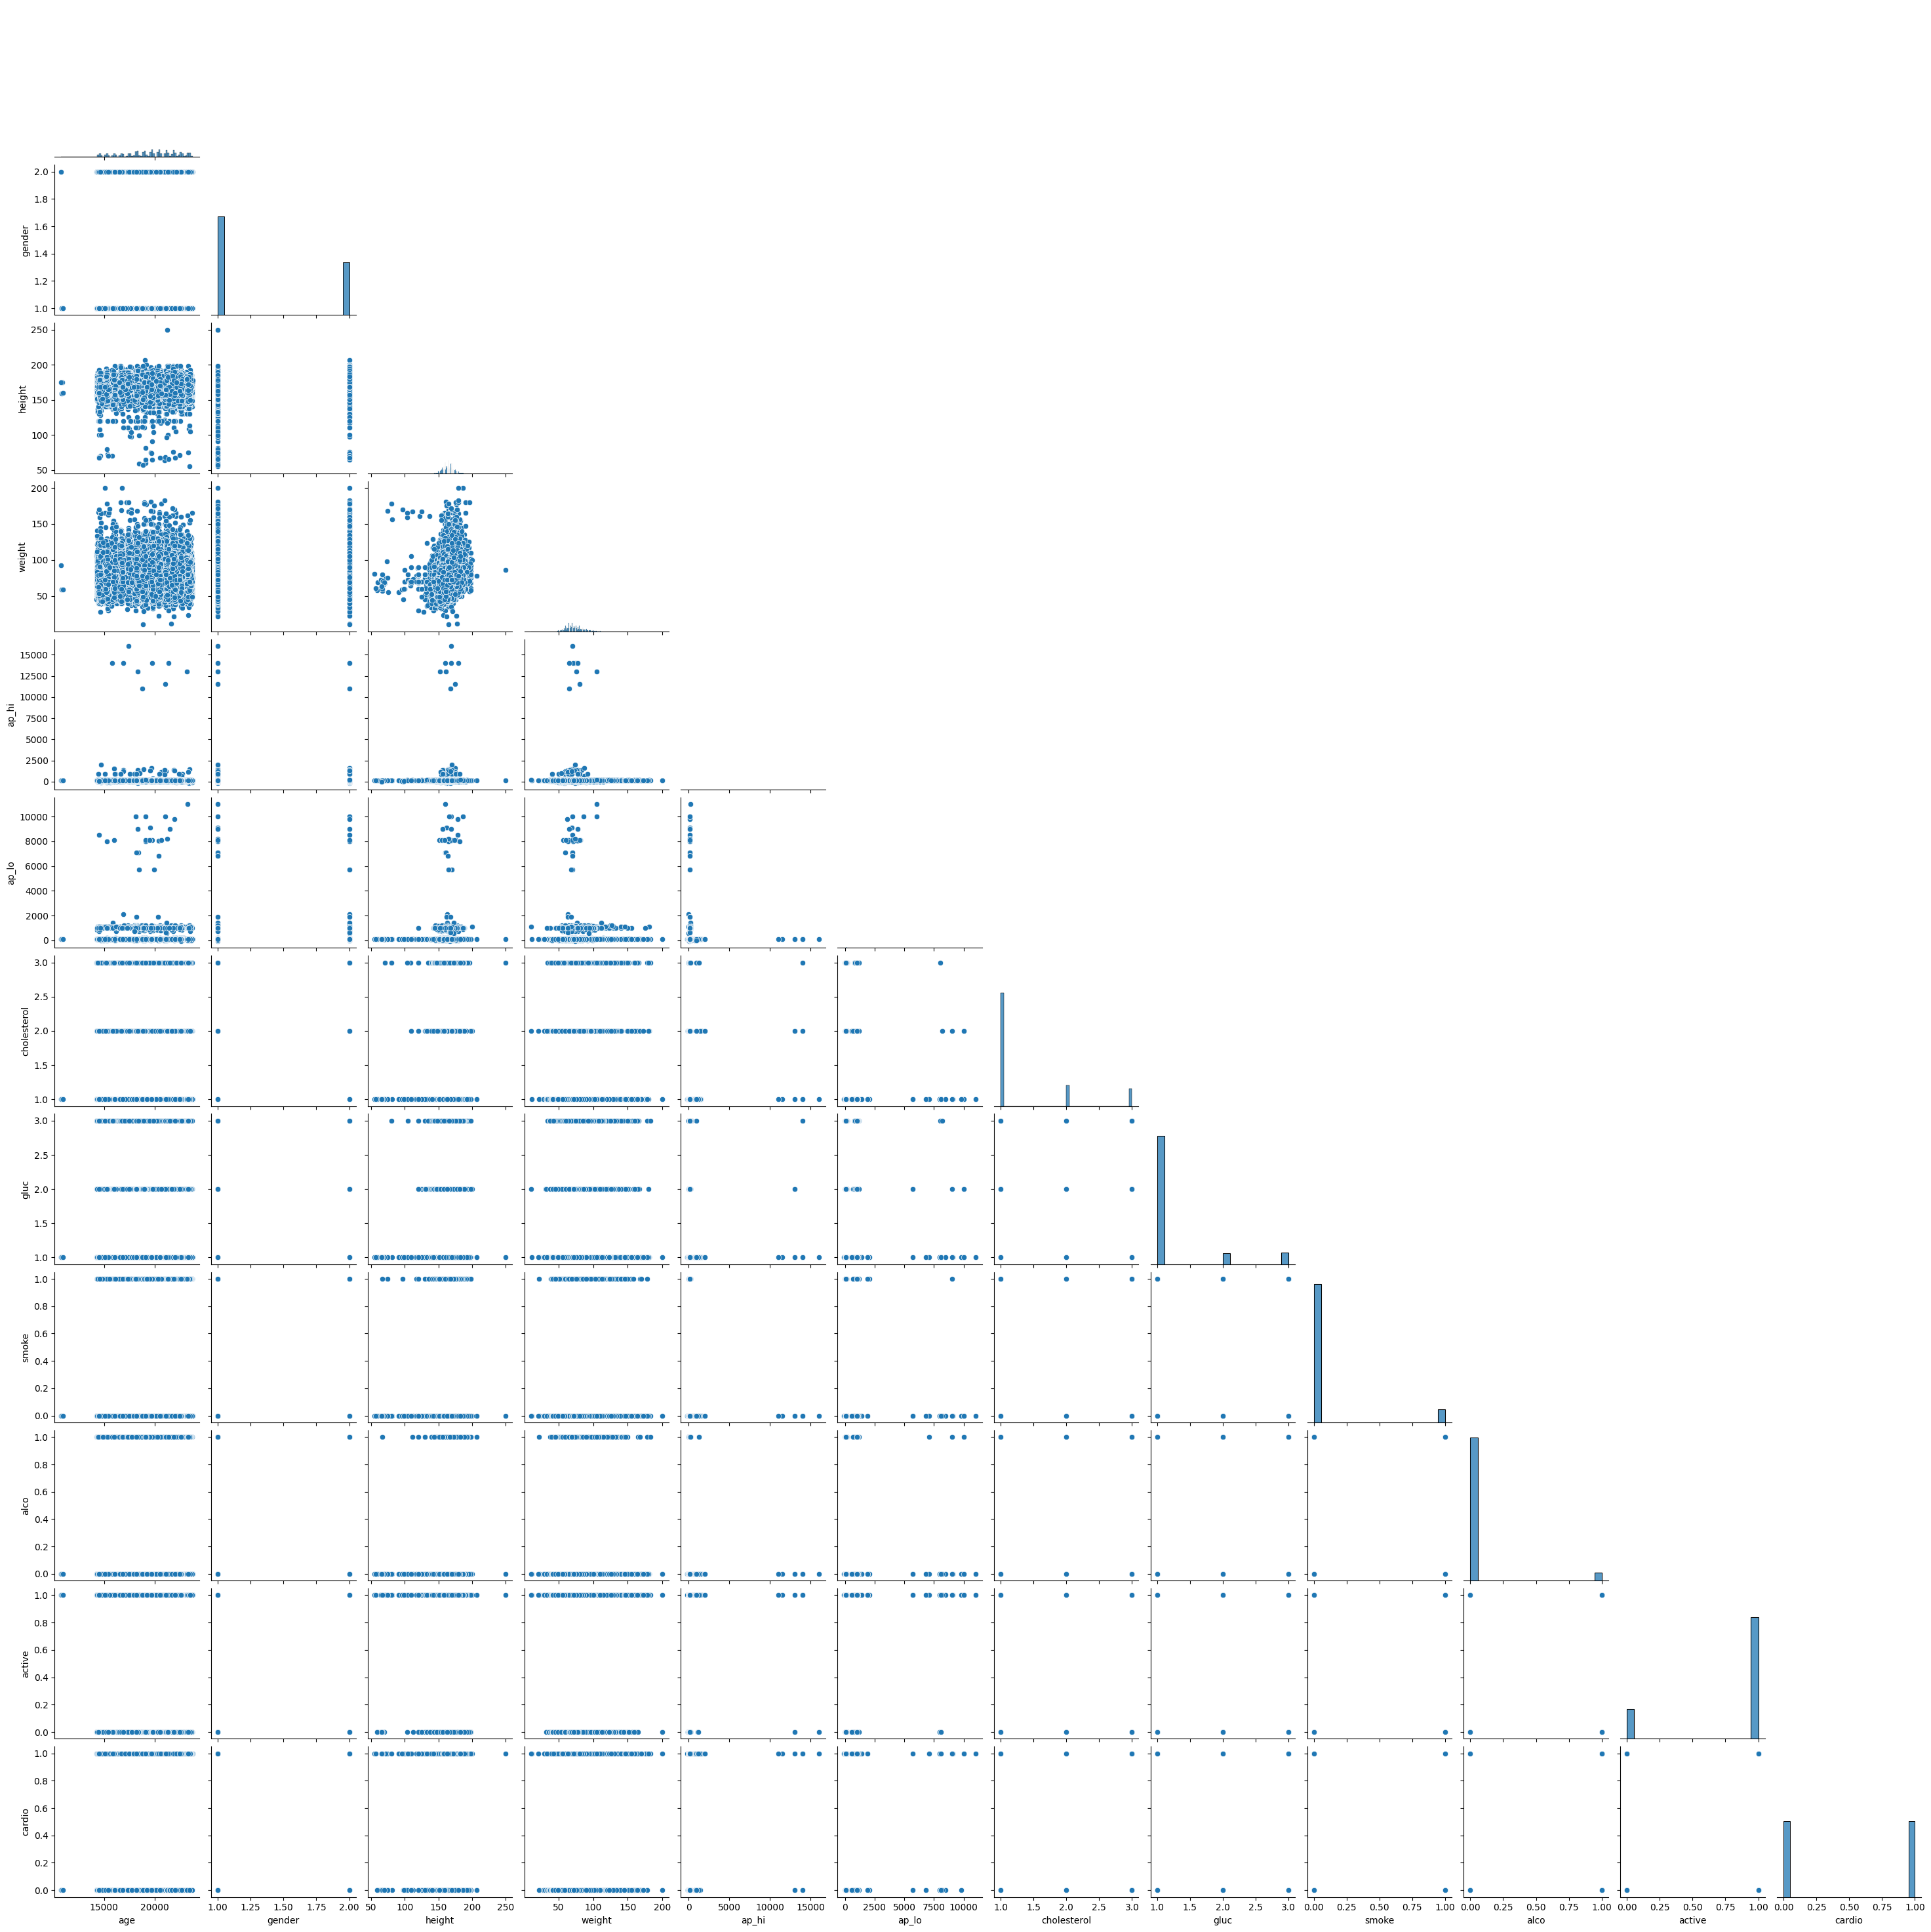

In [13]:
# Pairplot to find relationships among the dataset, beyond the covmatrix
# But there's no any clear correlation
sns.pairplot(data=data_cardio.iloc[:,1:], corner=True,
x_vars=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
y_vars=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [14]:
# Outliers in the data
def detect_outliers(Datos,x): # function to detect outliers
    Q3 = Datos[x].quantile(0.75)
    Q1 = Datos[x].quantile(0.25)
    IQR = Q3 - Q1
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = Datos[Datos[x] > superior].index
    out_inf = Datos[Datos[x] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
        for j in out_inf:
            outliers.append(j)
    
    size = len(outliers)
    size2 = len(Datos[x])
    percentage = round((size/size2)*100,3)

    return f'There are {size} outliers in variable {x} ({percentage}%), and correspond to the indixes: {outliers}'

In [15]:
# Find outliers 
# En general there aren't many outliers
outlier_age = detect_outliers(data_cardio,"age")
print(outlier_age)

There are 0 outliers in variable age (0.0%), and correspond to the indixes: []


In [ ]:
# As I wrote on the ReadME.md. This dataset is already proccesed, so I'll continue with the modeling part.